#Распознавание рукописного ввода на примере базы MNIST

Построить классификатор изображений рукописного ввода на базе MNIST. В качестве шаблона в данной работе можно использовать ipython-ноутбук [002-digit.ipynb](https://github.com/a4tunado/lectures/blob/master/002/002-digit.ipynb).

Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.

В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Загружаем исходные данные

In [ ]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [ ]:
train_img.shape

(42000, 28, 28)

##Визуализируем исходные данные

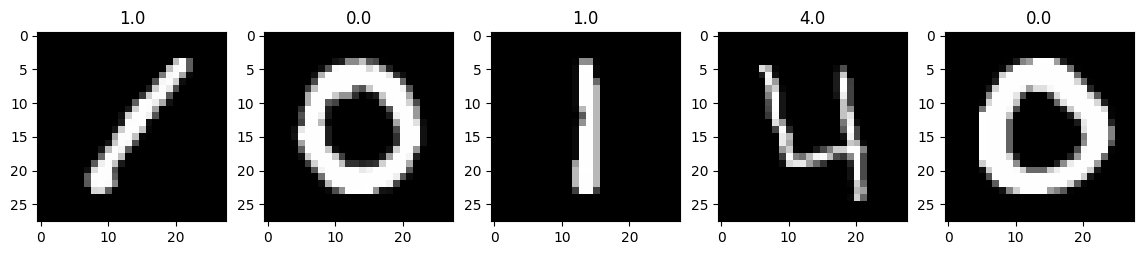

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [ ]:
# Сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# Приводим размерность к удобному для обработки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))

##HOGdescriptor

Задаем параметры для вычисления дескриптора

In [ ]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

Вычисляем дескриптор для изображения

In [ ]:
descriptor = hog.compute(np.uint8(train_img[0]))
print('Descriptor size: %d' % len(descriptor))

Descriptor size: 144


In [ ]:
descriptor

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.67266345e-01,
       5.67266345e-01, 5.67266345e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.70183107e-01,
       1.16283789e-01, 1.52903363e-01, 8.50583538e-02, 3.31392628e-03,
       1.09727378e-03, 0.00000000e+00, 1.07902829e-02, 2.67759208e-02,
       5.19081019e-02, 1.24265403e-01, 8.94716233e-02, 3.69357616e-02,
       1.95413623e-02, 6.67553544e-02, 0.00000000e+00, 6.47416785e-02,
       9.58514139e-02, 1.23392813e-01, 3.12334061e-01, 3.12334061e-01,
      

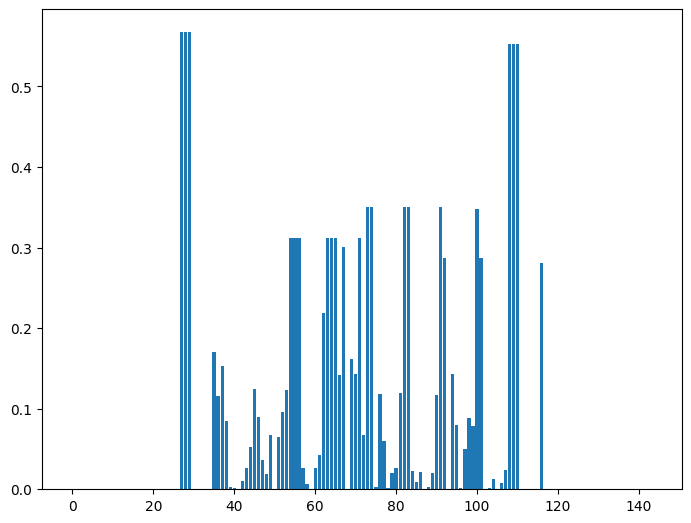

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(descriptor)), descriptor.reshape(-1))
plt.show()

In [ ]:
# Извлечение HOG дескрипторов для всех изображений
X_train_hog = []
for img in train_img:
    descriptor = hog.compute(np.uint8(img))
    X_train_hog.append(descriptor.ravel())  # используем ravel(), чтобы преобразовать массив в одномерный

In [ ]:
X_train_hog = np.array(X_train_hog)

In [ ]:
# Предобработка тестовых данных
X_test_hog = []
for img in test_img:
    descriptor = hog.compute(np.uint8(img))
    X_test_hog.append(descriptor.ravel())

##Обучение модели SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_hog, train_label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_val)

In [ ]:
# Предсказание классов на тестовом наборе данных
y_test_pred = clf.predict(X_test_hog)

In [ ]:
y_test_pred

array([2., 0., 9., ..., 3., 9., 2.])

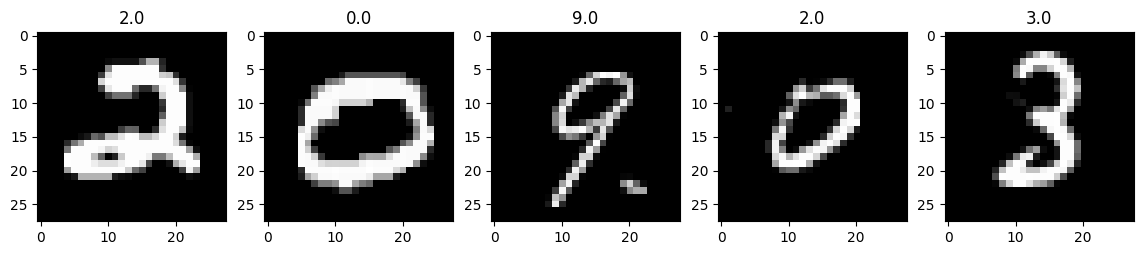

In [ ]:
# Визуализация предсказаний
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray')
    subplot.set_title('%s' % y_test_pred[i - 1])

In [ ]:
# Оценка модели
accuracy = clf.score(X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.983452380952381


##Матрица ошибок

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_val, y_pred)

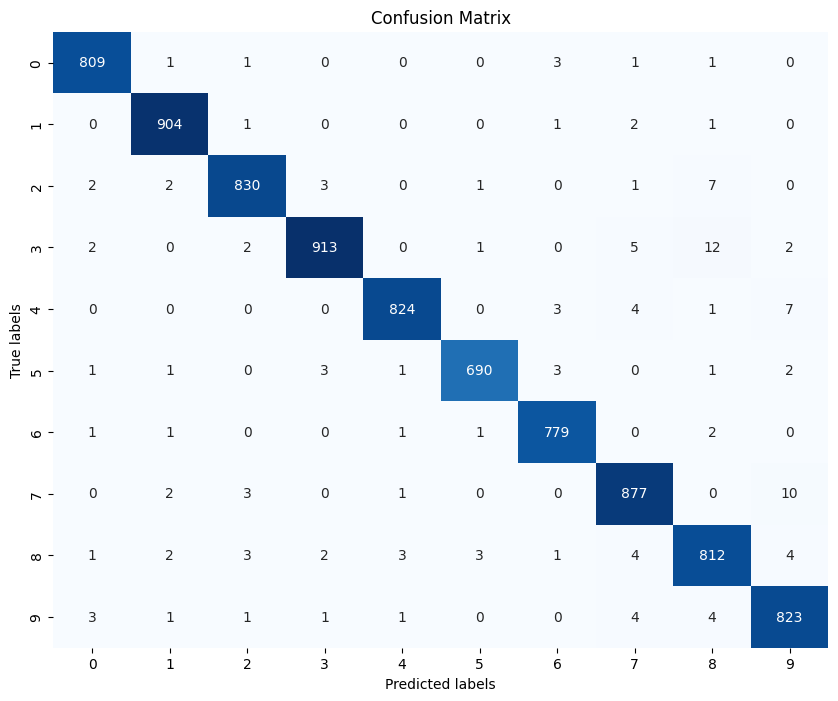

In [ ]:
# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_test_pred, 1):
        dst.write('%s,%s\n' % (i, p))

In [ ]:
!head submit.csv

ImageId,Label
1,2.0
2,0.0
3,9.0
4,2.0
5,3.0
6,7.0
7,0.0
8,3.0
9,0.0
